In [4]:
import pandas as pd

In [100]:
movies = pd.read_csv('/Users/diana/Downloads/movie_metadata.csv')

In [101]:
filtered_movies = pd.DataFrame()
for i,row in movies.iterrows():
    if 'Sci-Fi' in movies.loc[i, 'genres']:
        tmp = pd.DataFrame(movies.loc[i, :]).T
        filtered_movies = pd.concat([filtered_movies, tmp])


In [102]:
filtered_movies.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [138]:
# sorted selected columns for easier viewing
#to_subset = ['movie_title', 'title_year', 'director_name', 'genres', 'country', 'language', 'duration', 'content_rating', 'color', \
             #'actor_1_name', 'actor_2_name', 'actor_3_name', 'actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes', \
             #'cast_total_facebook_likes', 'director_facebook_likes', 'movie_facebook_likes', 'imdb_score', 'num_voted_users', 'num_user_for_reviews', 'num_critic_for_reviews', \
             #'facenumber_in_poster', 'gross', 'budget', 'aspect_ratio', 'movie_imdb_link', 'plot_keywords']

to_subset = ['movie_title', 'title_year', 'director_name', 'genres', 'country', 'language', 'duration', 'content_rating', 'color', \
             'actor_1_name', 'actor_2_name', 'actor_3_name', 'imdb_score', 'num_voted_users',
            'gross', 'budget', 'aspect_ratio', 'movie_imdb_link', 'plot_keywords']

filtered_movies = filtered_movies[to_subset]
filtered_movies

,movie_title,title_year,director_name,genres,country,language,duration,content_rating,color,actor_1_name,actor_2_name,actor_3_name,imdb_score,num_voted_users,gross,budget,aspect_ratio,movie_imdb_link,plot_keywords
0,Avatar,2009,James Cameron,Action|Adventure|Fantasy|Sci-Fi,USA,English,178,PG-13,Color,CCH Pounder,Joel David Moore,Wes Studi,7.9,886204,7.60506e+08,2.37e+08,1.78,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,avatar|future|marine|native|paraplegic
5,John Carter,2012,Andrew Stanton,Action|Adventure|Sci-Fi,USA,English,132,PG-13,Color,Daryl Sabara,Samantha Morton,Polly Walker,6.6,212204,7.30587e+07,2.637e+08,2.35,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,alien|american civil war|male nipple|mars|prin...
8,Avengers: Age of Ultron,2015,Joss Whedon,Action|Adventure|Sci-Fi,USA,English,141,PG-13,Color,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,7.5,462669,4.58992e+08,2.5e+08,2.35,http://www.imdb.com/title/tt2395427/?ref_=fn_t...,artificial intelligence|based on comic book|ca...
10,Batman v Superman: Dawn of Justice,2016,Zack Snyder,Action|Adventure|Sci-Fi,USA,English,183,PG-13,Color,Henry Cavill,Lauren Cohan,Alan D. Purwin,6.9,371639,3.30249e+08,2.5e+08,2.35,http://www.imdb.com/title/tt2975590/?ref_=fn_t...,based on comic book|batman|sequel to a reboot|...
11,Superman Returns,2006,Bryan Singer,Action|Adventure|Sci-Fi,USA,English,169,PG-13,Color,Kevin Spacey,Marlon Brando,Frank Langella,6.1,240396,2.00069e+08,2.09e+08,2.35,http://www.imdb.com/title/tt0348150/?ref_=fn_t...,crystal|epic|lex luthor|lois lane|return to earth
15,Man of Steel,2013,Zack Snyder,Action|Adventure|Fantasy|Sci-Fi,USA,English,143,PG-13,Color,Henry Cavill,Christopher Meloni,Harry Lennix,7.2,548573,2.91022e+08,2.25e+08,2.35,http://www.imdb.com/title/tt0770828/?ref_=fn_t...,based on comic book|british actor playing amer...
17,The Avengers,2012,Joss Whedon,Action|Adventure|Sci-Fi,USA,English,173,PG-13,Color,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,8.1,995415,6.2328e+08,2.2e+08,1.85,http://www.imdb.com/title/tt0848228/?ref_=fn_t...,alien invasion|assassin|battle|iron man|soldier
19,Men in Black 3,2012,Barry Sonnenfeld,Action|Adventure|Comedy|Family|Fantasy|Sci-Fi,USA,English,106,PG-13,Color,Will Smith,Michael Stuhlbarg,Nicole Scherzinger,6.8,268154,1.79021e+08,2.25e+08,1.85,http://www.imdb.com/title/tt1409024/?ref_=fn_t...,alien|criminal|m.i.b.|maximum security prison|...
27,Captain America: Civil War,2016,Anthony Russo,Action|Adventure|Sci-Fi,USA,English,147,PG-13,Color,Robert Downey Jr.,Scarlett Johansson,Chris Evans,8.2,272670,4.07197e+08,2.5e+08,2.35,http://www.imdb.com/title/tt3498820/?ref_=fn_t...,based on comic book|knife|marvel cinematic uni...
28,Battleship,2012,Peter Berg,Action|Adventure|Sci-Fi|Thriller,USA,English,131,PG-13,Color,Liam Neeson,Alexander Skarsgård,Tadanobu Asano,5.9,202382,6.51732e+07,2.09e+08,2.35,http://www.imdb.com/title/tt1440129/?ref_=fn_t...,box office flop|hawaii|naval|oahu hawaii|ship


In [159]:
print(max(filtered_movies['title_year']))

2016.0


In [139]:
filtered_movies.director_name.value_counts()

Paul W.S. Anderson       8
Steven Spielberg         7
Michael Bay              7
John Carpenter           6
Bryan Singer             5
James Cameron            5
Robert Rodriguez         5
Tim Burton               4
Barry Sonnenfeld         4
Guillermo del Toro       4
Joss Whedon              4
George Miller            4
M. Night Shyamalan       4
George Lucas             4
Roland Emmerich          4
Ridley Scott             4
Joseph Kosinski          4
Robert Zemeckis          4
Paul Verhoeven           4
Lana Wachowski           4
Francis Lawrence         4
Peter Hyams              4
Jonathan Frakes          4
Josh Trank               3
Jonathan Liebesman       3
Tim Johnson              3
Vincenzo Natali          3
Paul McGuigan            3
David Twohy              3
Joe Dante                3
                        ..
David Gelb               1
Hironobu Sakaguchi       1
Nick Hamm                1
Mike Mitchell            1
Ruben Fleischer          1
Hal Haberman             1
R

In [167]:
binInterval = [0, 2, 4, 6, 7, 8, 9]
binLabels   = ['0-2', '2-4', '4-6', '6-7', '7-8', '8-9']
filtered_movies['binned'] = pd.cut(filtered_movies['imdb_score'].values, bins = binInterval, labels=binLabels, include_lowest=True)


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [168]:
filtered_movies.to_csv('scifi_movie.csv', index=False)

In [169]:
filtered_movies_grp = pd.DataFrame(filtered_movies.groupby(['binned', 'country'])['imdb_score'].count()).reset_index()

In [170]:
filtered_movies_grp 

,binned,country,imdb_score
0,0-2,Germany,1
1,0-2,USA,1
2,2-4,Canada,3
3,2-4,UK,3
4,2-4,USA,22
5,4-6,Australia,4
6,4-6,Belgium,2
7,4-6,Cambodia,1
8,4-6,Canada,7
9,4-6,Denmark,1


In [171]:
filtered_movies_grp.to_csv('scifi_movie_grp.csv', index=False)

In [172]:
filtered_movies_grp

,binned,country,imdb_score
0,0-2,Germany,1
1,0-2,USA,1
2,2-4,Canada,3
3,2-4,UK,3
4,2-4,USA,22
5,4-6,Australia,4
6,4-6,Belgium,2
7,4-6,Cambodia,1
8,4-6,Canada,7
9,4-6,Denmark,1


ValueError: color kwarg must have one color per data set. 616 data sets and 1 colors were provided

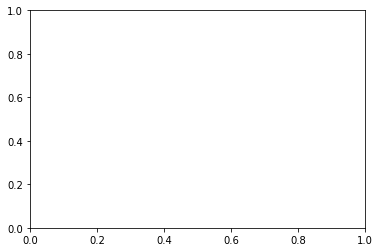

In [69]:
import seaborn as sns

sns.distplot(filtered_movies['imdb_score'].values, hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

In [151]:
for i in filtered_movies.plot_keywords:
    print(i)
    print('**************************')

avatar|future|marine|native|paraplegic
**************************
alien|american civil war|male nipple|mars|princess
**************************
artificial intelligence|based on comic book|captain america|marvel cinematic universe|superhero
**************************
based on comic book|batman|sequel to a reboot|superhero|superman
**************************
crystal|epic|lex luthor|lois lane|return to earth
**************************
based on comic book|british actor playing american character|final battle|origin of hero|reboot
**************************
alien invasion|assassin|battle|iron man|soldier
**************************
alien|criminal|m.i.b.|maximum security prison|prison
**************************
based on comic book|knife|marvel cinematic universe|returning character killed off|superhero
**************************
box office flop|hawaii|naval|oahu hawaii|ship
**************************
dinosaur|disaster film|experiment gone wrong|jurassic park|velociraptor
*********************